<a href="https://colab.research.google.com/github/JingyuanWu17/DL/blob/master/hw5prob3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise we will train a simple Q-network in TensorFlow to solve Tic Tac Toe.

In [59]:
import random
import collections
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

Hopefully everyone has played Tic Tac Toe at some point. Here is a [reminder](https://en.wikipedia.org/wiki/Tic-tac-toe). Let us set up some helper functions to define the game itself. The typical board size is 3x3 but we will be general.

In [60]:
def new_board(size):
    return np.zeros(shape=(size, size))

In [61]:
def available_moves(board):
    return np.argwhere(board == 0)

In [62]:
def check_game_end(board):
    best = max(list(board.sum(axis=0)) +    # columns
               list(board.sum(axis=1)) +    # rows
               [board.trace()] +            # main diagonal
               [np.fliplr(board).trace()],  # other diagonal
               key=abs)
    if abs(best) == board.shape[0]: 
        return np.sign(best)  # winning player, +1 or -1
    if available_moves(board).size == 0:
        return 0  # a draw (otherwise, return None by default)

Now, let's define our players. We will define three types of bots. A *random* player picks a random position in the board each move.

In [64]:
class Player():
    def new_game(self):
        pass

    def reward(self, value):
        pass

class RandomPlayer(Player):
    def move(self, board):
        return random.choice(available_moves(board))

A *boring* player always picks the *first* available position on the board (measured from top-left to bottom-right).

In [65]:
class BoringPlayer(Player):
    def move(self, board):
        return available_moves(board)[0]

We can simulate games by playing one bot vs another. The starting player is labeled +1.

In [66]:
def play(board, player_objs):
    for player in [+1, -1]:
        player_objs[player].new_game()
    player = +1
    game_end = check_game_end(board)
    while game_end is None:
        move = player_objs[player].move(board)
        board[tuple(move)] = player
        game_end = check_game_end(board)
        player *= -1  # switch players after each move
    for player in [+1, -1]:
        # the reward for wins is +1, and -1 for draws/losses
        reward_value = +1 if player == game_end else -1
        player_objs[player].reward(reward_value)
    return game_end

Number of wins by Play 1: 1194
Number of wins by Play 2: 564
Number of draws: 242


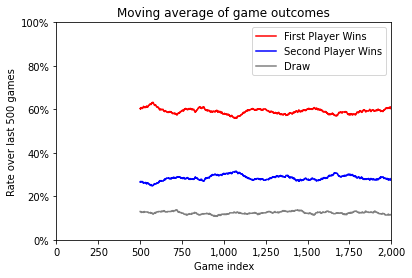

In [46]:
# 3x3, random vs. random
random.seed(1)

# TODO Q1. Play 2000 games between two bots, both of them random players.
# Print the number of wins by Player 1, number of wins by Player 2, and draws.
# Plot (as a function of game index) the moving average of game outcomes
# over a window of size 500. 
# You might find the following functions helpful for plotting.

player_objs = [RandomPlayer(), RandomPlayer()]
res = []
for i in range(2000):
    res.append(play(new_board(3), player_objs))

print("Number of wins by Play 1:", res.count(1))
print("Number of wins by Play 2:", res.count(-1))
print("Number of draws:", res.count(0));
show(res)

In [47]:
def moving(data, value, size):# calculates a moving average
    binary_data = [x == value for x in data]
    return [sum(binary_data[i-size:i])/size for i in range(size, len(data) + 1)]

def show(results, size=500, title='Moving average of game outcomes',
         first_label='First Player Wins', second_label='Second Player Wins', draw_label='Draw'):
    x_values = range(size, len(results) + 1)
    first = moving(results, value=+1, size=size)
    second = moving(results, value=-1, size=size)
    draw = moving(results, value=0, size=size)
    first, = plt.plot(x_values, first, color='red', label=first_label)
    second, = plt.plot(x_values, second, color='blue', label=second_label)
    draw, = plt.plot(x_values, draw, color='grey', label=draw_label)
    plt.xlim([0, len(results)])
    plt.ylim([0, 1])
    plt.title(title)
    plt.legend(handles=[first, second, draw], loc='best')
    ax = plt.gca()
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=1))
    ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.ylabel(f'Rate over last {size} games')
    plt.xlabel('Game index')
    plt.show()

Number of wins by Play 1: 1074
Number of wins by Play 2: 860
Number of draws: 66


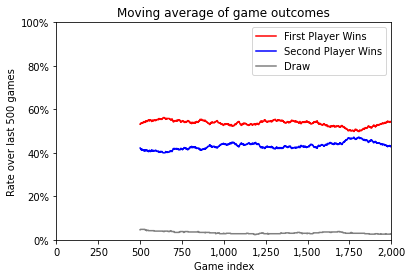

In [51]:
# 3x3, random vs. boring

# TODO Q2. Play 2000 games between two bots, where Player 1 is Random and Player 2 is Boring.
# Print the number of wins by Player 1, number of wins by Player 2, and draws.
# Plot (as a function of game index) the moving average of game outcomes.

# Comment on the results. Compare with your plot above. 
# Think about why this might be happening and explain your reasons.

player_objs = {1: RandomPlayer(), -1: BoringPlayer()}
res = []
for i in range(2000):
    res.append(play(new_board(3), player_objs))

print("Number of wins by Play 1:", res.count(1))
print("Number of wins by Play 2:", res.count(-1))
print("Number of draws:", res.count(0));
show(res)

# In random vs. random, the first random player has a much higher chance 
# to win(60%) than the second random player(30%). 
# I think it is because, for the players themselves, they are equal, but the 
# first random player has the advantage to move first, which gives him better
# chance to win.

# In random vs. boring, even though the random player still has a better chance 
# to win, their probability of winning is relatively close.
# I think it is because the random is the first player to move, who has the 
# natural advantage to win. However, according to boring player's moving pattern, 
# it will take over the rows as quick as possible, which to some extent is a better 
# strategy than randomly selecting under this game's rule. 
# So, the boring player did better than random.

### Compare results
In random vs. random, the first random player has a much higher chance to win(60%) than the second random player(30%). <br>
I think it is because, for the players themselves, they are equal, but the first random player has the advantage to move first, which gives him better chance to win.

In random vs. boring, even though the random player still has a better chance to win, their probability of winning is relatively close.<br>
I think it is because the random is the first player to move, who has the natural advantage to win. However, according to boring player's moving pattern, it will take over the rows as quick as possible, which to some extent is a better strategy than randomly selecting under this game's rule. 
So, the boring player did better than random.

We will now use Q-learning using a neural network to train an RL agent. 

The Q-function will be parametrically represented via a very simple single layer with linear activations (essentially, a linear model).

Complete the Q-learning part in the code snippet below.



Number of wins by Play 1: 1545
Number of wins by Play 2: 348
Number of draws: 107


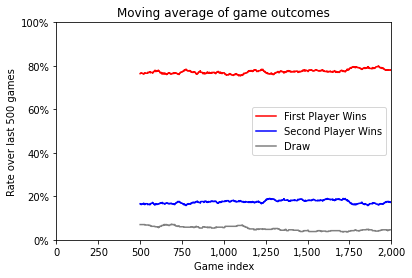

In [77]:
# 3x3 Boring vs Random
player_objs = {1: BoringPlayer(), -1: RandomPlayer()}
res = []
for i in range(2000):
    res.append(play(new_board(3), player_objs))

print("Number of wins by Play 1:", res.count(1))
print("Number of wins by Play 2:", res.count(-1))
print("Number of draws:", res.count(0));
show(res)


In [72]:
class Agent(Player):

    # Define single layer Q-network, MSE loss, and SGD optimizer
    def __init__(self, size, seed):
        self.size = size
        self.training = True
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.Dense(
            size**2,
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=seed)))
        self.model.compile(optimizer='sgd', loss='mean_squared_error')

    # Helper function to predict the Q-function
    def predict_q(self, board):
        return self.model.predict(
            np.array([board.ravel()])).reshape(self.size, self.size)

    # Helper function to train the network
    def fit_q(self, board, q_values):
        self.model.fit(
            np.array([board.ravel()]), np.array([q_values.ravel()]), verbose=0)

    # The agent preserves history, which is reset when a new game starts.
    def new_game(self):
        self.last_move = None
        self.board_history = []
        self.q_history = []

    # TODO Q3: Implement the "move" method below.
    # The "move" method should use the output of the Q-network 
    # that you defined above to pick the next best move.
    # Make sure you are only picking "legal" moves. 

    def move(self, board):
        # ... COMPLETE THIS
        q_values = self.predict_q(board)
        q_tmp = q_values.copy()
        q_tmp[board != 0] = float('-inf')
        move = np.unravel_index(np.argmax(q_tmp), board.shape)
        value = q_tmp.max()
        if self.last_move is not None:
            self.reward(value)
        self.board_history.append(board.copy())
        self.q_history.append(q_values)
        self.last_move = move
        return move

    # After picking the move, we call the reward method.
    # The reward method trains the Q-network, updating the Q-values with 
    # a new estimate for the last move. This is the Bellman update.
    def reward(self, reward_value):
        if not self.training:
            return
        new_q = self.q_history[-1].copy()
        new_q[self.last_move] = reward_value
        self.fit_q(self.board_history[-1], new_q)


Number of wins by Play 1: 1472
Number of wins by Play 2: 337
Number of draws: 191


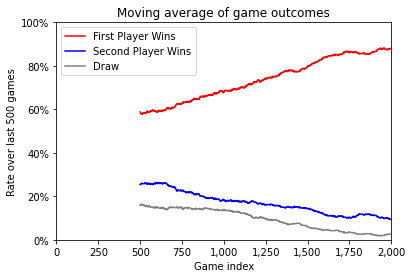

In [76]:
# 3x3, q-learning vs. random

# TODO Q4. Play 2000 games, where Player 1 is a Q-network and Player 2 is Random.
# Print the number of wins by Player 1, number of wins by Player 2, and draws.
# Plot (as a function of game index) the moving average of game outcomes.

player_objs = {1: Agent(3, 1), -1: RandomPlayer()}
res = []
for i in range(2000):
    res.append(play(new_board(3), player_objs))

print("Number of wins by Play 1:", res.count(1))
print("Number of wins by Play 2:", res.count(-1))
print("Number of draws:", res.count(0));
show(res)


Number of wins by Play 1: 826
Number of wins by Play 2: 1071
Number of draws: 103


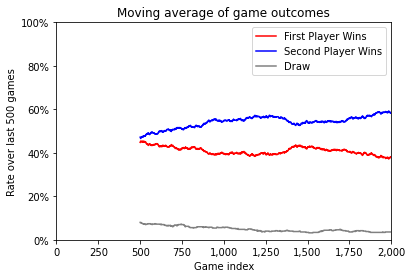

In [78]:
# 3x3 random vs.q-learning
player_objs = {1: RandomPlayer(), -1: Agent(3, 1)}
res = []
for i in range(2000):
    res.append(play(new_board(3), player_objs))

print("Number of wins by Play 1:", res.count(1))
print("Number of wins by Play 2:", res.count(-1))
print("Number of draws:", res.count(0));
show(res)